In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
filename = '/data/distribution_shift/augmented_qa/results/model_results.parquet.gzip'
model_df = pd.read_parquet(filename) 

model_df.head()

,question_set,questions,predictions,augmentation_model,parts_of_speech,frequency_percentile,augmentation_name,question_answering_model,exact_match,f1
0,amazon_reviews_v1_0,amazon_reviews_v1.0,amazon_reviews_v1_0_bert-large-cased-whole-wor...,orig,None,NaN,Original,bert-large-cased-whole-word-masking-finetuned-...,61.294891,76.448281
1,amazon_reviews_v1_0,amazon_reviews_v1.0,amazon_reviews_v1_0_bert-large-uncased-whole-w...,orig,None,NaN,Original,bert-large-uncased-whole-word-masking-finetune...,61.446636,77.010119
2,amazon_reviews_v1_0,amazon_reviews_v1.0,amazon_reviews_v1_0_distilbert-base-cased-dist...,orig,None,NaN,Original,distilbert-base-cased-distilled-squad,52.149722,67.433575
3,amazon_reviews_v1_0,amazon_reviews_v1.0,amazon_reviews_v1_0_distilbert-base-uncased-di...,orig,None,NaN,Original,distilbert-base-uncased-distilled-squad,51.785534,67.140229
4,reddit_v1_0,reddit_v1.0,reddit_v1_0_bert-large-cased-whole-word-maskin...,orig,None,NaN,Original,bert-large-cased-whole-word-masking-finetuned-...,61.215954,75.005330


In [3]:
filename = '/data/distribution_shift/augmented_qa/results/question_results.parquet.gzip'
question_df = pd.read_parquet(filename) 

question_df.head()

,question_set,questions,predictions,augmentation_model,augmentation_name,question_answering_model,question_id,exact_match,f1
0,amazon_reviews_v1_0,amazon_reviews_v1.0,amazon_reviews_v1_0_bert-large-cased-whole-wor...,orig,Original,bert-large-cased-whole-word-masking-finetuned-...,5dd465dacc027a086d65bc6c,True,1.000000
1,amazon_reviews_v1_0,amazon_reviews_v1.0,amazon_reviews_v1_0_bert-large-cased-whole-wor...,orig,Original,bert-large-cased-whole-word-masking-finetuned-...,5dd465dacc027a086d65bc6d,False,0.888889
2,amazon_reviews_v1_0,amazon_reviews_v1.0,amazon_reviews_v1_0_bert-large-cased-whole-wor...,orig,Original,bert-large-cased-whole-word-masking-finetuned-...,5dd465dacc027a086d65bc6e,True,1.000000
3,amazon_reviews_v1_0,amazon_reviews_v1.0,amazon_reviews_v1_0_bert-large-cased-whole-wor...,orig,Original,bert-large-cased-whole-word-masking-finetuned-...,5dd465dacc027a086d65bc6f,False,0.571429
4,amazon_reviews_v1_0,amazon_reviews_v1.0,amazon_reviews_v1_0_bert-large-cased-whole-wor...,orig,Original,bert-large-cased-whole-word-masking-finetuned-...,5dd465dacc027a086d65bc70,False,0.000000


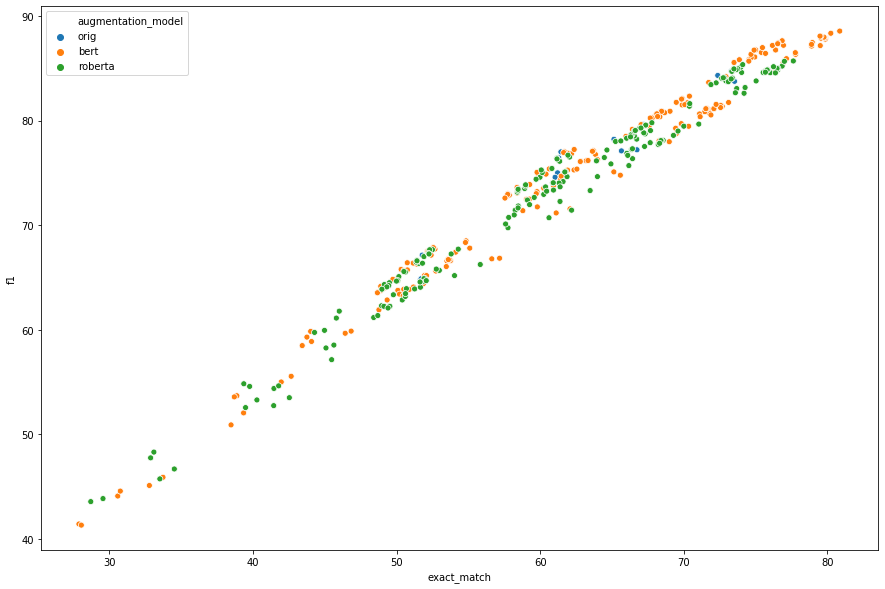

In [4]:
plt.figure(figsize=(15,10))
g =sns.scatterplot(x="exact_match", y="f1",
              hue="augmentation_model",
              data=model_df);

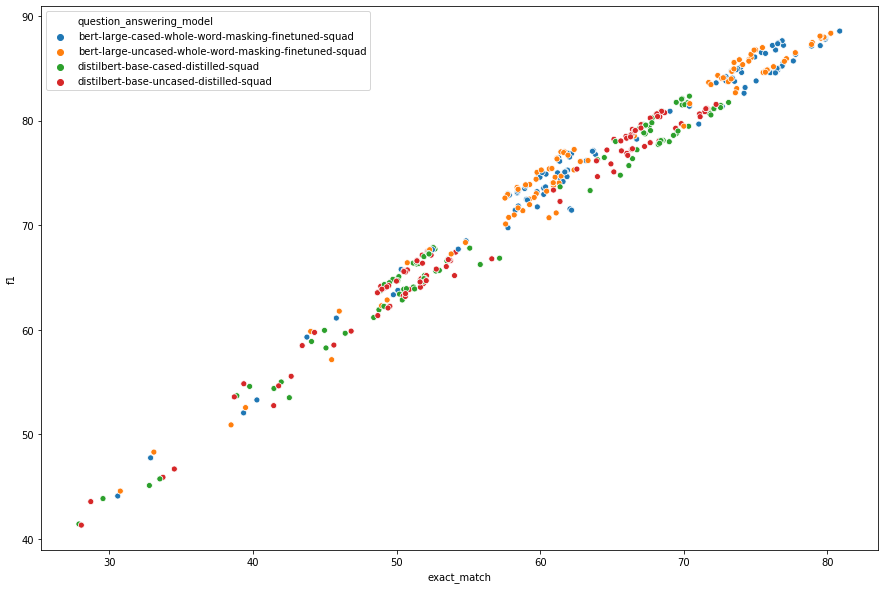

In [5]:
plt.figure(figsize=(15,10))
g =sns.scatterplot(x="exact_match", y="f1",
              hue="question_answering_model",
              data=model_df);

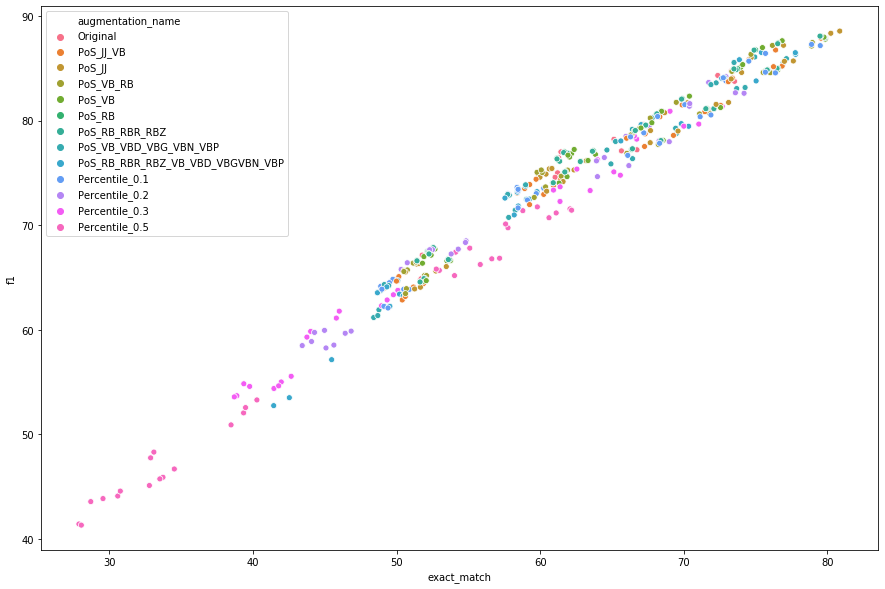

In [6]:
plt.figure(figsize=(15,10))
g =sns.scatterplot(x="exact_match", y="f1",
              hue="augmentation_name",
              data=model_df);


In [7]:
orig_scores = model_df.loc[model_df.augmentation_name == 'Original', ['question_set', 'question_answering_model', 'exact_match', 'f1']]

model_df['exact_match_delta'] = np.nan
model_df['f1_delta'] = np.nan

for score in orig_scores.iterrows():
    mask = (model_df['question_set'] == score[1]['question_set']) & \
    (model_df['question_answering_model'] == score[1]['question_answering_model'])
    
    model_df['exact_match_delta'][mask] = model_df['exact_match'] - score[1]['exact_match']
    model_df['f1_delta'][mask] = model_df['f1'] - score[1]['f1']


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


[Text(0, 0, 'Original'),
 Text(0, 0, 'Percentile_0.1'),
 Text(0, 0, 'Percentile_0.2'),
 Text(0, 0, 'Percentile_0.3'),
 Text(0, 0, 'Percentile_0.5'),
 Text(0, 0, 'PoS_JJ'),
 Text(0, 0, 'PoS_JJ_VB'),
 Text(0, 0, 'PoS_RB'),
 Text(0, 0, 'PoS_RB_RBR_RBZ'),
 Text(0, 0, 'PoS_RB_RBR_RBZ_VB_VBD_VBGVBN_VBP'),
 Text(0, 0, 'PoS_VB'),
 Text(0, 0, 'PoS_VB_RB'),
 Text(0, 0, 'PoS_VB_VBD_VBG_VBN_VBP')]

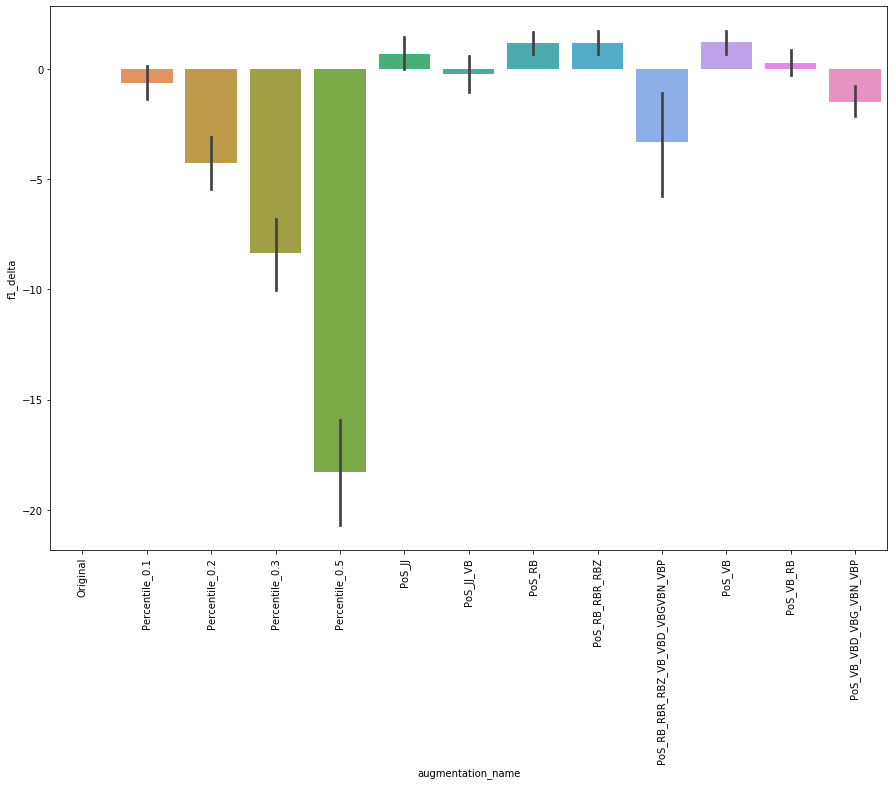

In [8]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x="augmentation_name", y="f1_delta", data=model_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0, 0, 'amazon_reviews_v1_0'),
 Text(0, 0, 'new_wiki_v1.0'),
 Text(0, 0, 'nyt_v1.0'),
 Text(0, 0, 'reddit_v1_0')]

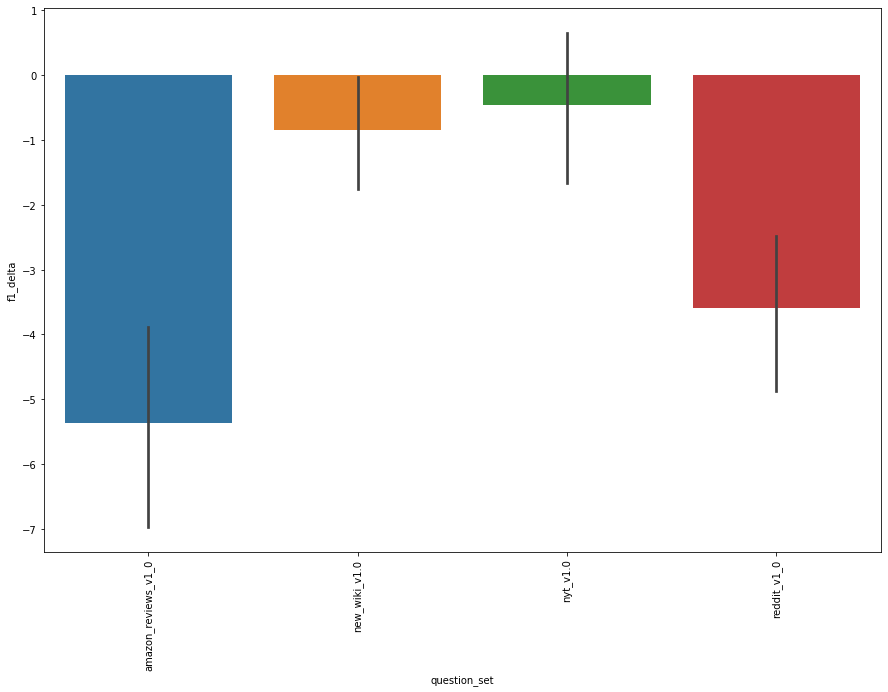

In [9]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x="question_set", y="f1_delta", data=model_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0, 0, 'amazon_reviews_v1_0'),
 Text(0, 0, 'new_wiki_v1.0'),
 Text(0, 0, 'nyt_v1.0'),
 Text(0, 0, 'reddit_v1_0')]

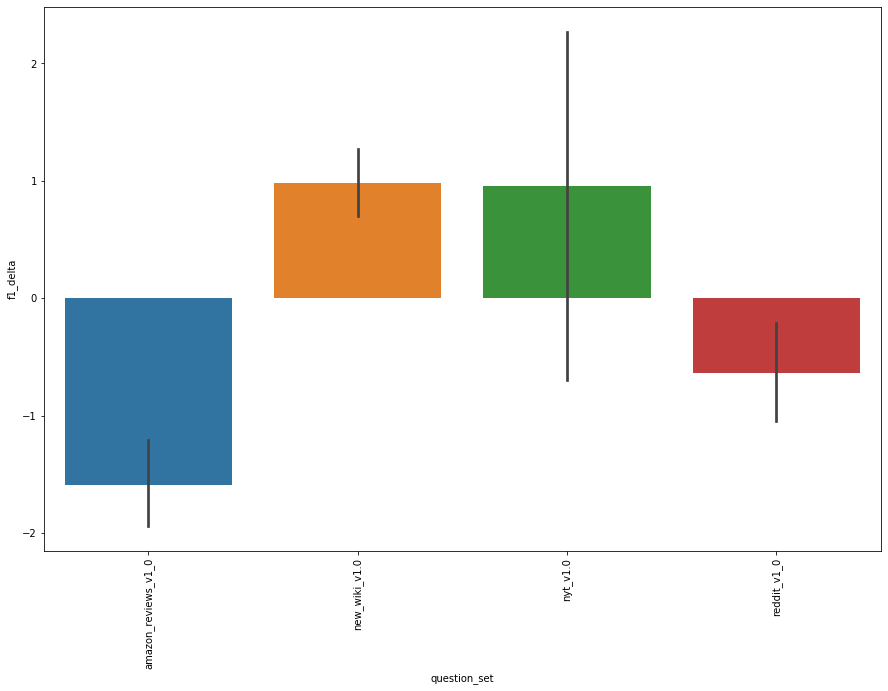

In [10]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x="question_set", y="f1_delta", data=model_df[model_df['augmentation_name'].str.startswith('PoS')])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0, 0, 'bert-large-cased-whole-word-masking-finetuned-squad'),
 Text(0, 0, 'bert-large-uncased-whole-word-masking-finetuned-squad'),
 Text(0, 0, 'distilbert-base-cased-distilled-squad'),
 Text(0, 0, 'distilbert-base-uncased-distilled-squad')]

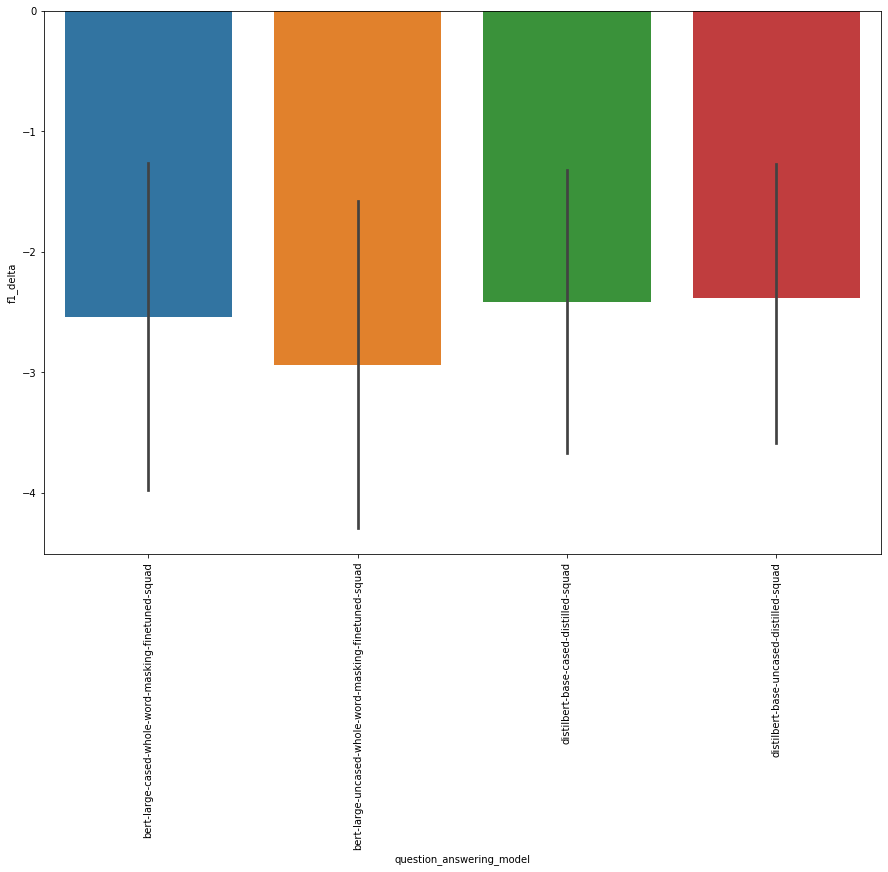

In [11]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x="question_answering_model", y="f1_delta", data=model_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [12]:
# question_df.head()

# orig_question_scores = question_df.loc[question_df.augmentation_model == 'orig', ['question_set', 'question_answering_model', 'question_id', 'exact_match', 'f1']]

# question_df['exact_match_delta'] = np.nan
# question_df['f1_delta'] = np.nan

# for score in orig_question_scores.iterrows():
#     mask = (question_df['question_set'] == score[1]['question_set']) & \
#     (question_df['question_answering_model'] == score[1]['question_answering_model']) & \
#     (question_df['question_id'] == score[1]['question_id']) 
    
#     question_df['exact_match_delta'][mask] = (question_df['exact_match']*1) - (score[1]['exact_match']*1)
#     question_df['f1_delta'][mask] = question_df['f1'] - score[1]['f1']

In [13]:
orig_question_scores = question_df.loc[question_df.augmentation_model == 'orig', ['question_set', 'question_answering_model', 'question_id', 'exact_match', 'f1']]

# Merge the original (unaugmented) scores
question_df = pd.merge(question_df, orig_question_scores, how='inner', on=['question_set', 'question_answering_model', 'question_id'], left_on=None, right_on=None,
         left_index=False, right_index=False, sort=False,
         suffixes=('', '_orig'), copy=True, indicator=False,
         validate=None)

In [14]:
# Calculate and append the delta
question_df['exact_match_delta'] = question_df['exact_match']*1 - question_df['exact_match_orig']*1
question_df['f1_delta'] = question_df['f1'] - question_df['f1_orig']
question_df.head()

,question_set,questions,predictions,augmentation_model,augmentation_name,question_answering_model,question_id,exact_match,f1,exact_match_orig,f1_orig,exact_match_delta,f1_delta
0,amazon_reviews_v1_0,amazon_reviews_v1.0,amazon_reviews_v1_0_bert-large-cased-whole-wor...,orig,Original,bert-large-cased-whole-word-masking-finetuned-...,5dd465dacc027a086d65bc6c,True,1.0,True,1.0,0,0.0
1,amazon_reviews_v1_0,amazon_reviews_v1_0_bert_JJ_VB,amazon_reviews_v1_0_bert_JJ_VB_bert-large-case...,bert,PoS_JJ_VB,bert-large-cased-whole-word-masking-finetuned-...,5dd465dacc027a086d65bc6c,True,1.0,True,1.0,0,0.0
2,amazon_reviews_v1_0,amazon_reviews_v1_0_bert_JJ,amazon_reviews_v1_0_bert_JJ_bert-large-cased-w...,bert,PoS_JJ,bert-large-cased-whole-word-masking-finetuned-...,5dd465dacc027a086d65bc6c,True,1.0,True,1.0,0,0.0
3,amazon_reviews_v1_0,amazon_reviews_v1_0_bert_VB_RB,amazon_reviews_v1_0_bert_VB_RB_bert-large-case...,bert,PoS_VB_RB,bert-large-cased-whole-word-masking-finetuned-...,5dd465dacc027a086d65bc6c,True,1.0,True,1.0,0,0.0
4,amazon_reviews_v1_0,amazon_reviews_v1_0_bert_VB,amazon_reviews_v1_0_bert_VB_bert-large-cased-w...,bert,PoS_VB,bert-large-cased-whole-word-masking-finetuned-...,5dd465dacc027a086d65bc6c,True,1.0,True,1.0,0,0.0


In [15]:
question_df.groupby("augmentation_name")[["f1_delta", "exact_match_delta"]].mean()

,f1_delta,exact_match_delta
augmentation_name,,
Original,0.000000,0.000000
Percentile_0.1,-0.023308,-0.027077
Percentile_0.2,-0.061688,-0.068644
Percentile_0.3,-0.103611,-0.112248
Percentile_0.5,-0.204159,-0.210108
PoS_JJ,-0.016825,-0.020128
PoS_JJ_VB,-0.026344,-0.030451
PoS_RB,0.003593,0.002703
PoS_RB_RBR_RBZ,0.003382,0.002533


[Text(0, 0.5, 'Change in F1'), Text(0.5, 0, 'Original F1')]

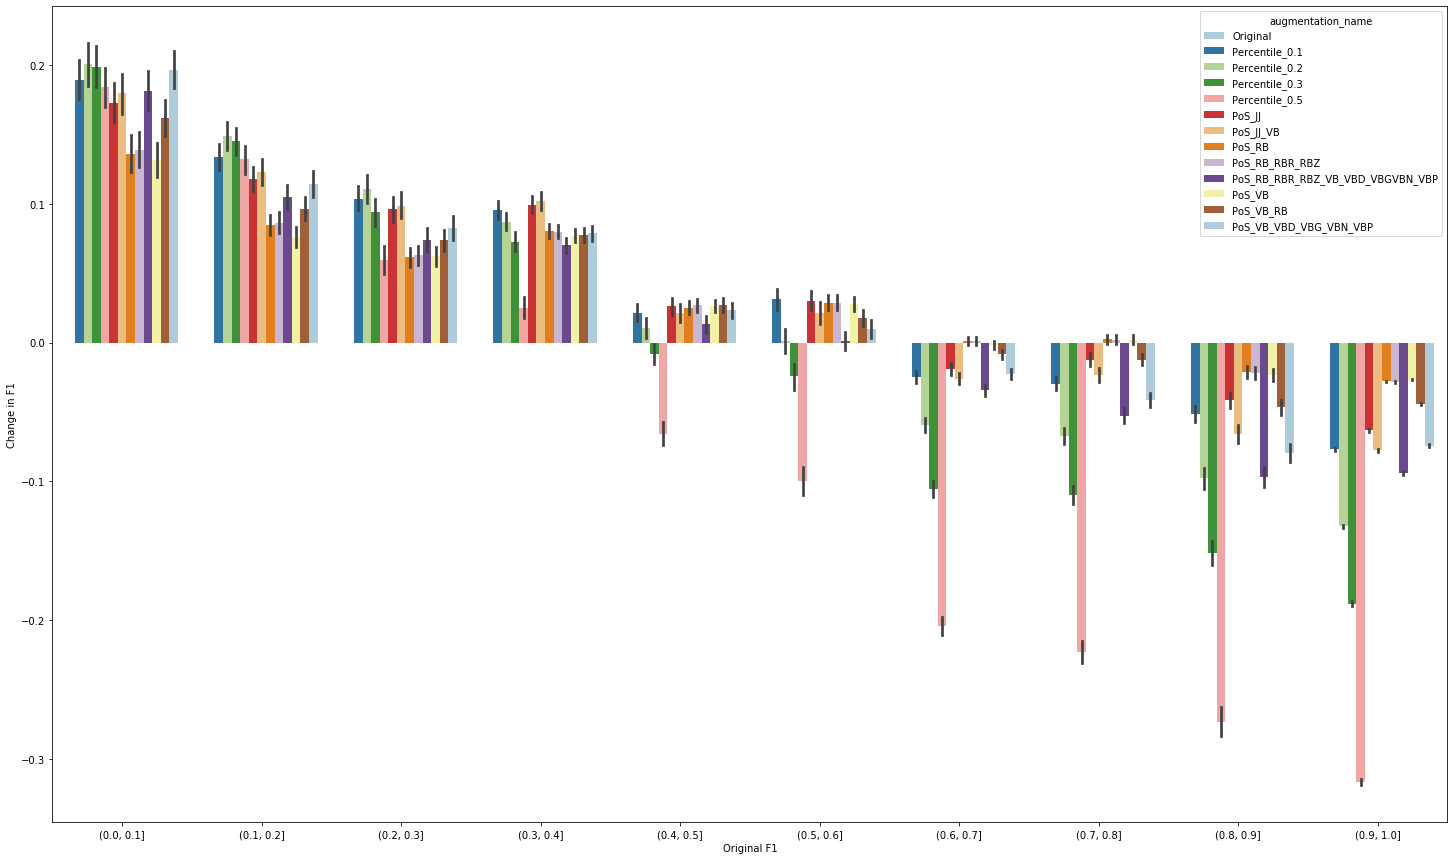

In [16]:
# bins = [-1, -0.5, 0, 0.5, 1]
plt.figure(figsize=(25,15))

bins = np.arange(0, 1.1, 0.1).tolist()

question_df['binned'] = pd.cut(question_df['f1_orig'], bins=bins)


ax = sns.barplot(x="binned", y="f1_delta", hue="augmentation_name", palette="Paired", data=question_df)
ax.set(xlabel='Original F1', ylabel='Change in F1')

In [17]:
question_df.loc[question_df['f1_orig'] > 0.1].groupby("augmentation_name")[["f1_delta"]].mean()

,f1_delta
augmentation_name,
Original,0.000000
Percentile_0.1,-0.054128
Percentile_0.2,-0.102376
Percentile_0.3,-0.152407
Percentile_0.5,-0.269390
PoS_JJ,-0.043288
PoS_JJ_VB,-0.055904
PoS_RB,-0.014649
PoS_RB_RBR_RBZ,-0.015028


In [18]:
question_df.loc[question_df['f1_orig'] <= 0.1].groupby("augmentation_name")["f1_delta"].mean()

augmentation_name
Original                            0.000000
Percentile_0.1                      0.164236
Percentile_0.2                      0.186486
Percentile_0.3                      0.194221
Percentile_0.5                      0.193459
PoS_JJ                              0.151195
PoS_JJ_VB                           0.161538
PoS_RB                              0.111550
PoS_RB_RBR_RBZ                      0.112314
PoS_RB_RBR_RBZ_VB_VBD_VBGVBN_VBP    0.147279
PoS_VB                              0.106288
PoS_VB_RB                           0.127930
PoS_VB_VBD_VBG_VBN_VBP              0.148024
Name: f1_delta, dtype: float64

In [19]:
question_df.loc[(question_df['f1_orig'] < question_df["f1"])].groupby("augmentation_name")["f1_delta"].count()

augmentation_name
Original                                0
Percentile_0.1                      23519
Percentile_0.2                      26473
Percentile_0.3                      27559
Percentile_0.5                      27570
PoS_JJ                              21053
PoS_JJ_VB                           22479
PoS_RB                              17444
PoS_RB_RBR_RBZ                      17579
PoS_RB_RBR_RBZ_VB_VBD_VBGVBN_VBP    22158
PoS_VB                              16196
PoS_VB_RB                           19666
PoS_VB_VBD_VBG_VBN_VBP              22426
Name: f1_delta, dtype: int64

In [20]:
question_df.loc[(question_df['f1_orig'] > question_df["f1"])].groupby("augmentation_name")["f1_delta"].count()

augmentation_name
Original                                0
Percentile_0.1                      31307
Percentile_0.2                      48289
Percentile_0.3                      64177
Percentile_0.5                      98197
PoS_JJ                              26402
PoS_JJ_VB                           31474
PoS_RB                              15646
PoS_RB_RBR_RBZ                      15888
PoS_RB_RBR_RBZ_VB_VBD_VBGVBN_VBP    37482
PoS_VB                              14190
PoS_VB_RB                           21918
PoS_VB_VBD_VBG_VBN_VBP              31390
Name: f1_delta, dtype: int64

In [21]:
question_df.loc[(question_df['f1_orig'] > 0.5) & (question_df["f1"] <= 0.5)].groupby("augmentation_name")["f1_delta"].count()

augmentation_name
Original                                0
Percentile_0.1                      18160
Percentile_0.2                      30724
Percentile_0.3                      43345
Percentile_0.5                      72355
PoS_JJ                              14640
PoS_JJ_VB                           17902
PoS_RB                               7204
PoS_RB_RBR_RBZ                       7322
PoS_RB_RBR_RBZ_VB_VBD_VBGVBN_VBP    22878
PoS_VB                               6946
PoS_VB_RB                           11319
PoS_VB_VBD_VBG_VBN_VBP              18239
Name: f1_delta, dtype: int64

In [22]:
question_df.loc[(question_df['f1_orig'] <= 0.5) & (question_df["f1"] > 0.5)].groupby("augmentation_name")["f1_delta"].count()

augmentation_name
Original                                0
Percentile_0.1                      11392
Percentile_0.2                      12639
Percentile_0.3                      12997
Percentile_0.5                      12518
PoS_JJ                              10054
PoS_JJ_VB                           10664
PoS_RB                               8364
PoS_RB_RBR_RBZ                       8441
PoS_RB_RBR_RBZ_VB_VBD_VBGVBN_VBP    10594
PoS_VB                               7938
PoS_VB_RB                            9496
PoS_VB_VBD_VBG_VBN_VBP              10822
Name: f1_delta, dtype: int64

In [23]:
question_df.loc[question_df['exact_match_orig']].groupby("augmentation_name")["exact_match_orig"].mean()

augmentation_name
Original                            True
Percentile_0.1                      True
Percentile_0.2                      True
Percentile_0.3                      True
Percentile_0.5                      True
PoS_JJ                              True
PoS_JJ_VB                           True
PoS_RB                              True
PoS_RB_RBR_RBZ                      True
PoS_RB_RBR_RBZ_VB_VBD_VBGVBN_VBP    True
PoS_VB                              True
PoS_VB_RB                           True
PoS_VB_VBD_VBG_VBN_VBP              True
Name: exact_match_orig, dtype: bool

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


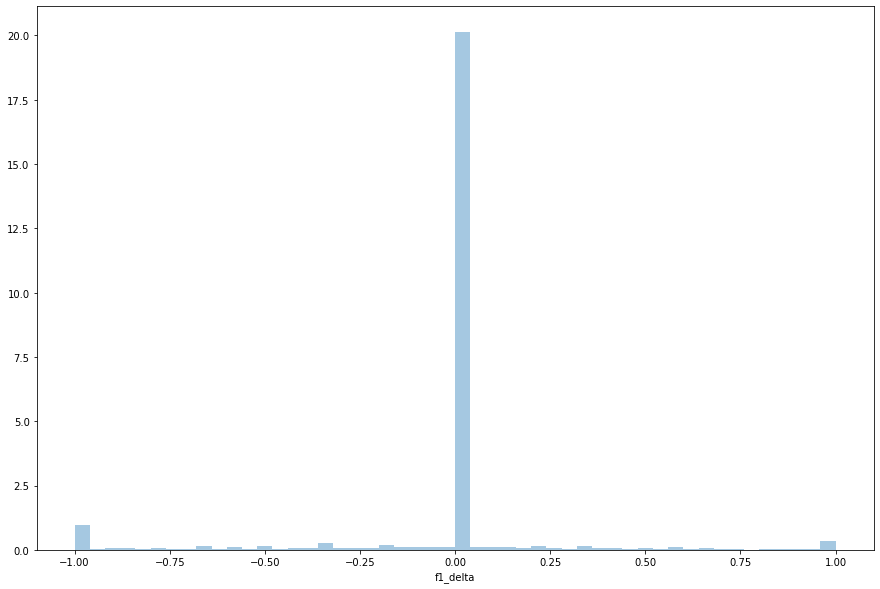

In [24]:
plt.figure(figsize=(15,10))
sns.distplot(question_df['f1_delta'])

In [25]:
question_df.head()

,question_set,questions,predictions,augmentation_model,augmentation_name,question_answering_model,question_id,exact_match,f1,exact_match_orig,f1_orig,exact_match_delta,f1_delta,binned
0,amazon_reviews_v1_0,amazon_reviews_v1.0,amazon_reviews_v1_0_bert-large-cased-whole-wor...,orig,Original,bert-large-cased-whole-word-masking-finetuned-...,5dd465dacc027a086d65bc6c,True,1.0,True,1.0,0,0.0,"(0.9, 1.0]"
1,amazon_reviews_v1_0,amazon_reviews_v1_0_bert_JJ_VB,amazon_reviews_v1_0_bert_JJ_VB_bert-large-case...,bert,PoS_JJ_VB,bert-large-cased-whole-word-masking-finetuned-...,5dd465dacc027a086d65bc6c,True,1.0,True,1.0,0,0.0,"(0.9, 1.0]"
2,amazon_reviews_v1_0,amazon_reviews_v1_0_bert_JJ,amazon_reviews_v1_0_bert_JJ_bert-large-cased-w...,bert,PoS_JJ,bert-large-cased-whole-word-masking-finetuned-...,5dd465dacc027a086d65bc6c,True,1.0,True,1.0,0,0.0,"(0.9, 1.0]"
3,amazon_reviews_v1_0,amazon_reviews_v1_0_bert_VB_RB,amazon_reviews_v1_0_bert_VB_RB_bert-large-case...,bert,PoS_VB_RB,bert-large-cased-whole-word-masking-finetuned-...,5dd465dacc027a086d65bc6c,True,1.0,True,1.0,0,0.0,"(0.9, 1.0]"
4,amazon_reviews_v1_0,amazon_reviews_v1_0_bert_VB,amazon_reviews_v1_0_bert_VB_bert-large-cased-w...,bert,PoS_VB,bert-large-cased-whole-word-masking-finetuned-...,5dd465dacc027a086d65bc6c,True,1.0,True,1.0,0,0.0,"(0.9, 1.0]"
